## Multi-class Classification

### Visualizing the data

In [2]:
%cd C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex3\\ex3
%pwd

C:\Users\s\Downloads\machine_learning\machine-learning-ex3\ex3


'C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex3\\ex3'

(5000, 400) (5000, 1)


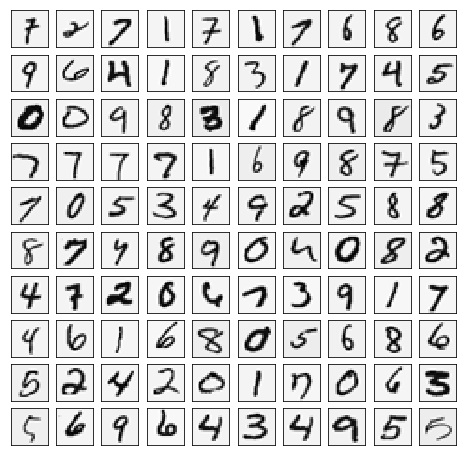

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.io import loadmat


data = loadmat('ex3data1.mat')
x0 = np.array([img.reshape(20, 20).T for img in data['X']])
x0 = np.array([img.reshape(400) for img in x0])  # transpose to correct image orientation
y0 = data['y']
print(x0.shape, y0.shape)

idx = np.random.choice(np.arange(x0.shape[0]), 100)
sample = x0[idx, :]

fig, ax_array = plt.subplots(nrows=10, ncols=10, sharex='all', sharey='all', figsize=(8, 8))

for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(sample[r * 10 + c].reshape(20, 20), cmap=cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
plt.show()
    

### Vectorizing Logistic Regression

In [88]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    
    return g


def cost(theta, x, y, reg):
    theta = theta.reshape(-1, 1)
    theta_1 = theta[1:, :]
    m = x.shape[0]
    j = -1 * np.sum(y * (np.log(sigmoid(x.dot(theta)))) + (1 - y) * (np.log(1 - sigmoid(x.dot(theta))))) / m + reg / (2 * m) * theta_1.T.dot(theta_1)
    
    return j


def gradient(theta, x, y, reg):
    theta = theta.reshape(-1, 1)
    theta_1 = theta[1:, :]
    m = x.shape[0]
    grad = (x.T.dot(sigmoid(x.dot(theta)) - y)) / m
    grad[1:, :] += reg / m * theta_1
    
    return grad.ravel()


### One-vs-all Classification

In [90]:
from scipy import optimize


def one_vs_all(x, y, num_labels, reg):
    m = x.shape[0]
    n = x.shape[1]
    all_theta = np.zeros((num_labels, n+1))
    x = np.hstack((np.ones((m, 1)), x))
    
    for i in range(1, num_labels+1):
        initial_theta = np.zeros((1, n+1))
        y_i = np.array([1 if label == i else 0 for label in y]).reshape(-1, 1)
        param = optimize.minimize(fun=cost, x0=initial_theta, args=(x, y_i, reg), jac=gradient, method='CG')
        all_theta[i-1, :] = param.x
        
    return all_theta


pred_theta = one_vs_all(x0, y0, 10, 1)
print(pred_theta)

[[-2.38699729e+00  0.00000000e+00 -1.23643904e-09 ...  2.74134615e-04
   1.22834040e-05  0.00000000e+00]
 [-3.18506379e+00  0.00000000e+00 -1.55919855e-06 ...  1.99233778e-03
  -1.36858867e-04  0.00000000e+00]
 [-4.80238603e+00  0.00000000e+00 -9.78026512e-09 ...  1.22872591e-03
   1.77668734e-05  0.00000000e+00]
 ...
 [-7.98774302e+00  0.00000000e+00 -5.03509711e-09 ...  8.65547571e-03
  -6.23157885e-04  0.00000000e+00]
 [-4.57212129e+00  0.00000000e+00 -2.31749017e-08 ... -9.02867072e-04
  -1.21958357e-03  0.00000000e+00]
 [-5.37923609e+00  0.00000000e+00 -5.25793628e-09 ... -2.04794381e-04
   4.89060586e-04  0.00000000e+00]]


### One-vs-all Prediction

In [109]:
def predict_one_vs_all(all_theta, x):
    m = x.shape[0]
    x = np.hstack((np.ones((m, 1)), x))
    h = np.argmax(sigmoid(x.dot(all_theta.T)), axis=1)
    
    return h+1
    
pred_y = predict_one_vs_all(pred_theta, x0)
check = [1 if a == b else 0 for (a, b) in zip(pred_y, y0)]
accuracy = np.mean(check)
print('Training Set Accuracy: {}%'.format(accuracy * 100))

Training Set Accuracy: 94.46%


## Neural Networks

In [121]:
trained_param = loadmat('ex3weights.mat')
Theta1 = trained_param['Theta1']
Theta2 = trained_param['Theta2']
print(Theta1.shape, Theta2.shape)

def predict(theta1, theta2, x):
    m = x.shape[0]
    x = np.hstack((np.ones((m, 1)), x))
    a2 = sigmoid(x.dot(theta1.T))
    a2 = np.hstack((np.ones((m, 1)), a2))
    a3 = sigmoid(a2.dot(theta2.T))
    p = np.argmax(a3, axis=1) + 1
    
    return p

pred_y1 = predict(Theta1, Theta2, data['X'])  # do not input x0 as it's been transposed
print('Accuracy: {}%'.format(np.mean(pred_y1.reshape(-1, 1) == y0) * 100))


(25, 401) (10, 26)
Accuracy: 97.52%
